https://hmmlearn.readthedocs.io/en/latest/auto_examples/index.html 
Sampling from HMM
-----------------

This script shows how to sample points from a Hiden Markov Model (HMM):
we use a 4-components with specified mean and covariance.

The plot show the sequence of observations generated with the transitions
between them. We can see that, as specified by our transition matrix,
there are no transition between component 1 and 3.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from hmmlearn import hmm

Prepare parameters for a 4-components HMM
Initial population probability



In [2]:
startprob = np.array([0.6, 0.3, 0.1, 0.0])
startprob

array([0.6, 0.3, 0.1, 0. ])

In [3]:
# The transition matrix
# Note that there are no transitions possible between components
# 1 and 3  & 2 and 4
transmat = np.array([[0.7, 0.2, 0.0, 0.1],
                     [0.3, 0.5, 0.2, 0.0],
                     [0.0, 0.3, 0.5, 0.2],
                     [0.2, 0.0, 0.2, 0.6]])
transmat

array([[0.7, 0.2, 0. , 0.1],
       [0.3, 0.5, 0.2, 0. ],
       [0. , 0.3, 0.5, 0.2],
       [0.2, 0. , 0.2, 0.6]])

In [4]:
# The means of each component
means = np.array([[0.0,  0.0],
                  [0.0, 11.0],
                  [9.0, 10.0],
                  [11.0, -1.0]])
means

array([[ 0.,  0.],
       [ 0., 11.],
       [ 9., 10.],
       [11., -1.]])

In [5]:
.5 * np.identity(2) # '*' numpy - elementwise product, '@' - Matrix Product

array([[0.5, 0. ],
       [0. , 0.5]])

In [6]:
# Covariance parameters for each state
covars = .5 * np.tile(np.identity(2), (4, 1, 1))

In [7]:
covars[0,:,:]

array([[0.5, 0. ],
       [0. , 0.5]])

In [8]:
covars[1,:,:]

array([[0.5, 0. ],
       [0. , 0.5]])

In [9]:
covars[2,:,:]

array([[0.5, 0. ],
       [0. , 0.5]])

In [10]:
covars[3,:,:]

array([[0.5, 0. ],
       [0. , 0.5]])

In [11]:
# Build an HMM instance and set parameters
model = hmm.GaussianHMM(n_components=4, covariance_type="full")

# Instead of fitting it from the data, we directly set the estimated
# parameters, the means and covariance of the components
model.startprob_ = startprob
model.transmat_ = transmat
model.means_ = means
model.covars_ = covars

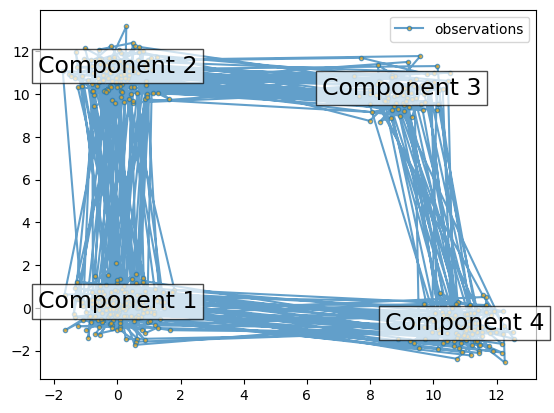

In [12]:
# Generate samples
X, Z = model.sample(500)

# Plot the sampled data
plt.plot(X[:, 0], X[:, 1], ".-", label="observations", ms=6,
         mfc="orange", alpha=0.7)

# Indicate the component numbers
for i, m in enumerate(means):
    plt.text(m[0], m[1], 'Component %i' % (i + 1),
             size=17, horizontalalignment='center',
             bbox=dict(alpha=.7, facecolor='w'))
    # bbox is a dictionary of Rectangle properties - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html
plt.legend(loc='best')
plt.show()